**Fecha de actualizacion** 3 de Diciembre de 2020

## Obtencion y entendimiento de los datos

Ya sea que los datos se obtengan por descarga o de manera automatica, es importante que haya comprension de donde estan saliendo los datos y como es que estan estructurados. 

- revisar diccionario de campos (si hay disponible)
- comprender que significa cada campo, o por lo menos con los que se busca trabajar

---
*En este ejemplo se descargan automaticamente los ultimos datos de coronavirus, directo del portal oficial de datos abiertos.*

In [1]:
#Descargando automaticamente los ultimos datos en la carpeta data
import requests
import zipfile,io
save_path="data/"
res=requests.get("http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip",stream=True)
print(res.status_code)
if(res.status_code==200):
    z = zipfile.ZipFile(io.BytesIO(res.content))
    z.extractall(save_path)

200


In [2]:
#obteniendo el ultimo archivo, en caso de que en el directorio haya mas
import glob
import os

list_of_files = glob.glob(save_path+"*COVID19MEXICO.csv")
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)

data/201202COVID19MEXICO.csv


In [3]:
#lectuara de los datos en un dataframe
import pandas as pd
#evitando que las claves de entidad y municipio sean numero
covid_df=pd.read_csv(latest_file,encoding="iso-8859-1",dtype={"ENTIDAD_RES":object,"MUNICIPIO_RES":object})
#generando una clave que integre estado y municipio
covid_df["CVEGEOMUN"]=covid_df["ENTIDAD_RES"]+covid_df["MUNICIPIO_RES"]
#covid_df["caso"]=1
print(covid_df.shape)
covid_df.head()

(2919879, 41)


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CVEGEOMUN
0,2020-12-02,071735,2,9,21,2,21,21,114,1,...,1,1,2,97,3,99,MÃ©xico,97,97,21114
1,2020-12-02,1426fb,1,4,10,1,28,10,007,1,...,1,1,2,97,3,99,MÃ©xico,97,97,10007
2,2020-12-02,1c4583,2,12,9,2,9,09,004,1,...,1,1,2,97,3,99,MÃ©xico,97,97,09004
3,2020-12-02,0d55c9,2,12,9,1,9,09,016,1,...,1,1,2,97,3,99,MÃ©xico,97,97,09016
4,2020-12-02,1468a5,1,4,5,1,15,05,018,1,...,1,1,2,97,3,99,MÃ©xico,97,97,05018


In [4]:
covid_df["MUNICIPIO_RES"].unique()

array(['114', '007', '004', '016', '018', '010', '104', '106', '008',
       '015', '017', '067', '005', '012', '120', '020', '055', '085',
       '057', '006', '002', '060', '050', '119', '037', '039', '003',
       '014', '027', '041', '108', '001', '193', '019', '013', '035',
       '031', '028', '053', '058', '102', '121', '030', '029', '048',
       '011', '144', '143', '131', '999', '065', '026', '033', '087',
       '038', '095', '047', '009', '109', '051', '101', '078', '021',
       '140', '036', '046', '068', '278', '022', '025', '024', '054',
       '044', '081', '118', '043', '128', '045', '390', '077', '409',
       '099', '166', '103', '069', '413', '100', '191', '032', '097',
       '076', '042', '174', '122', '074', '540', '115', '073', '052',
       '155', '088', '385', '070', '098', '116', '107', '399', '056',
       '063', '089', '083', '096', '254', '185', '178', '156', '064',
       '084', '135', '061', '212', '142', '349', '206', '125', '034',
       '138', '059',

In [5]:
#conociendo las columnas
covid_df.dtypes

FECHA_ACTUALIZACION      object
ID_REGISTRO              object
ORIGEN                    int64
SECTOR                    int64
ENTIDAD_UM                int64
SEXO                      int64
ENTIDAD_NAC               int64
ENTIDAD_RES              object
MUNICIPIO_RES            object
TIPO_PACIENTE             int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                  int64
NEUMONIA                  int64
EDAD                      int64
NACIONALIDAD              int64
EMBARAZO                  int64
HABLA_LENGUA_INDIG        int64
INDIGENA                  int64
DIABETES                  int64
EPOC                      int64
ASMA                      int64
INMUSUPR                  int64
HIPERTENSION              int64
OTRA_COM                  int64
CARDIOVASCULAR            int64
OBESIDAD                  int64
RENAL_CRONICA             int64
TABAQUISMO                int64
OTRO_CASO                 int64
TOMA_MUE

In [6]:
#revisando el diccionario de campos
diccionario_campos=pd.read_excel("diccionario-datos-covid/201128 Descriptores_.xlsx")
diccionario_campos

,Nº,NOMBRE DE VARIABLE,DESCRIPCIÓN DE VARIABLE,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,"La base de datos se alimenta diariamente, esta...",AAAA-MM-DD
1,2,ID_REGISTRO,Número identificador del caso,TEXTO
2,3,ORIGEN,La vigilancia centinela se realiza a través de...,CATÁLOGO: ORIGEN ...
3,4,SECTOR,Identifica el tipo de institución del Sistema ...,CATÁLOGO: SECTOR ...
4,5,ENTIDAD_UM,Identifica la entidad donde se ubica la unidad...,CATALÓGO: ENTIDADES
5,6,SEXO,Identifica al sexo del paciente.,CATÁLOGO: SEXO
6,7,ENTIDAD_NAC,Identifica la entidad de nacimiento del paciente.,CATALÓGO: ENTIDADES
7,8,ENTIDAD_RES,Identifica la entidad de residencia del paciente.,CATALÓGO: ENTIDADES
8,9,MUNICIPIO_RES,Identifica el municipio de residencia del paci...,CATALÓGO: MUNICIPIOS
9,10,TIPO_PACIENTE,Identifica el tipo de atención que recibió el ...,CATÁLOGO: TIPO_PACIENTE


- *La revision de diccionarios de campo no es necesaria que sea mediante programacion, pero es importante tenerla a la mano durante todo el proceso*

## Planteamiento de un problema

Lo que buscamos resolver, conocer o entregar del ejercicio que se efectuara. Puede estar definido desde el principio o incluso irse definiendo en el proceso. 

Importante tener claro
- granuralidad, por ejemplo si es a nivel municipal, estatal o nacional
- en la medida de lo posible, buscar una manera de comprobar nuesrtos resultados


---
*Para este ejemplo podemos plantear lo siguiente:*


- *1.- conocer los casos asociados a tabaqusimo que  han sido intubados a lo largo de la pandemia por estado*
- *2.- Para el estado de Mexico conocer la relacion entre la poblacion (numero de habitantes ) y el numero de casos positivos*

#### planteamiento 1

In [7]:
#de los datos solo obtener los casos confirmados, 
#los casos que no son confirmados son irrelevantes para lo que buscamos conocer
casos_confirmados=covid_df[(covid_df["CLASIFICACION_FINAL"]==1)|(covid_df["CLASIFICACION_FINAL"]==2)|(covid_df["CLASIFICACION_FINAL"]==3)]
casos_confirmados

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CVEGEOMUN
0,2020-12-02,071735,2,9,21,2,21,21,114,1,...,1,1,2,97,3,99,MÃ©xico,97,97,21114
1,2020-12-02,1426fb,1,4,10,1,28,10,007,1,...,1,1,2,97,3,99,MÃ©xico,97,97,10007
2,2020-12-02,1c4583,2,12,9,2,9,09,004,1,...,1,1,2,97,3,99,MÃ©xico,97,97,09004
3,2020-12-02,0d55c9,2,12,9,1,9,09,016,1,...,1,1,2,97,3,99,MÃ©xico,97,97,09016
4,2020-12-02,1468a5,1,4,5,1,15,05,018,1,...,1,1,2,97,3,99,MÃ©xico,97,97,05018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919845,2020-12-02,2d3b82,1,12,9,2,9,09,010,1,...,2,97,1,1,3,99,MÃ©xico,97,97,09010
2919862,2020-12-02,29c755,2,12,9,2,13,15,121,1,...,2,97,1,1,3,99,MÃ©xico,97,97,15121
2919866,2020-12-02,3dbbdb,1,12,9,1,9,09,012,1,...,2,97,1,1,3,99,MÃ©xico,97,97,09012
2919869,2020-12-02,387342,2,12,9,1,15,09,015,1,...,2,97,1,1,3,99,MÃ©xico,97,97,09015


diccionario tabaquismo:
```
CLAVE	DESCRIPCIÓN
1	SI 
2	NO 
97	NO APLICA
98	SE IGNORA
99	NO ESPECIFICADO
```

In [8]:
casos_confirmados["TABAQUISMO"].unique()

array([ 2,  1, 98])

In [9]:
##filtrar solo los casos asociados con tabaquismo
casos_conf_tabaq=casos_confirmados[casos_confirmados["TABAQUISMO"]==1]

casos_conf_tabaq

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CVEGEOMUN
17,2020-12-02,185d7d,1,12,9,1,9,09,010,1,...,1,1,2,97,3,99,MÃ©xico,97,97,09010
48,2020-12-02,023336,2,12,9,1,9,09,016,1,...,1,1,2,97,3,99,MÃ©xico,97,97,09016
59,2020-12-02,019405,2,12,27,2,27,27,004,1,...,1,1,2,97,3,99,MÃ©xico,97,97,27004
60,2020-12-02,0b0e89,2,3,25,2,25,25,006,2,...,1,1,2,97,3,99,MÃ©xico,97,2,25006
65,2020-12-02,0ce859,1,4,17,1,17,17,007,1,...,1,1,2,97,3,99,MÃ©xico,97,97,17007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919475,2020-12-02,3f45ca,2,12,9,2,9,09,009,1,...,2,97,1,1,3,99,MÃ©xico,97,97,09009
2919505,2020-12-02,2084ec,1,12,9,1,9,09,005,1,...,2,97,1,1,3,99,MÃ©xico,97,97,09005
2919535,2020-12-02,21d1f5,2,12,9,1,15,09,009,1,...,2,97,1,1,3,99,MÃ©xico,97,97,09009
2919686,2020-12-02,42d3b8,2,12,9,2,9,09,010,1,...,2,97,1,2,1,99,MÃ©xico,97,97,09010


In [10]:
porcentaje_nacional=(casos_conf_tabaq.shape[0]/casos_confirmados.shape[0])*100
print("A nivel nacional, el porcentaje de casos confirmados asociados al tabaquismo es " + str(porcentaje_nacional))

A nivel nacional, el porcentaje de casos confirmados asociados al tabaquismo es 7.379767169219124


In [11]:
#obteniendo solo los intubados
casos_conf_tabaq_int=casos_conf_tabaq[casos_conf_tabaq["INTUBADO"]==1]

casos_conf_tabaq_int

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CVEGEOMUN
127,2020-12-02,0aea87,2,6,9,2,9,09,012,2,...,1,1,2,97,3,99,MÃ©xico,97,1,09012
131,2020-12-02,1a35f6,2,4,9,2,9,09,007,2,...,1,1,2,97,3,99,MÃ©xico,97,2,09007
390,2020-12-02,0d3766,2,12,9,2,9,09,010,2,...,1,1,2,97,3,99,MÃ©xico,97,1,09010
452,2020-12-02,1277f2,2,4,21,2,21,21,114,2,...,1,1,2,97,3,99,MÃ©xico,97,2,21114
503,2020-12-02,040fd2,1,4,32,2,32,32,020,2,...,1,1,2,97,3,99,MÃ©xico,97,2,32020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911809,2020-12-02,342820,2,12,9,2,9,15,020,2,...,2,97,2,97,1,99,MÃ©xico,97,2,15020
2911852,2020-12-02,223275,1,6,9,2,9,09,007,2,...,2,97,2,97,1,99,MÃ©xico,97,2,09007
2913187,2020-12-02,2b5997,1,6,9,2,11,09,007,2,...,2,97,2,97,1,99,MÃ©xico,97,2,09007
2914594,2020-12-02,3a07a9,2,12,9,2,9,09,013,2,...,2,97,2,97,1,99,MÃ©xico,97,1,09013


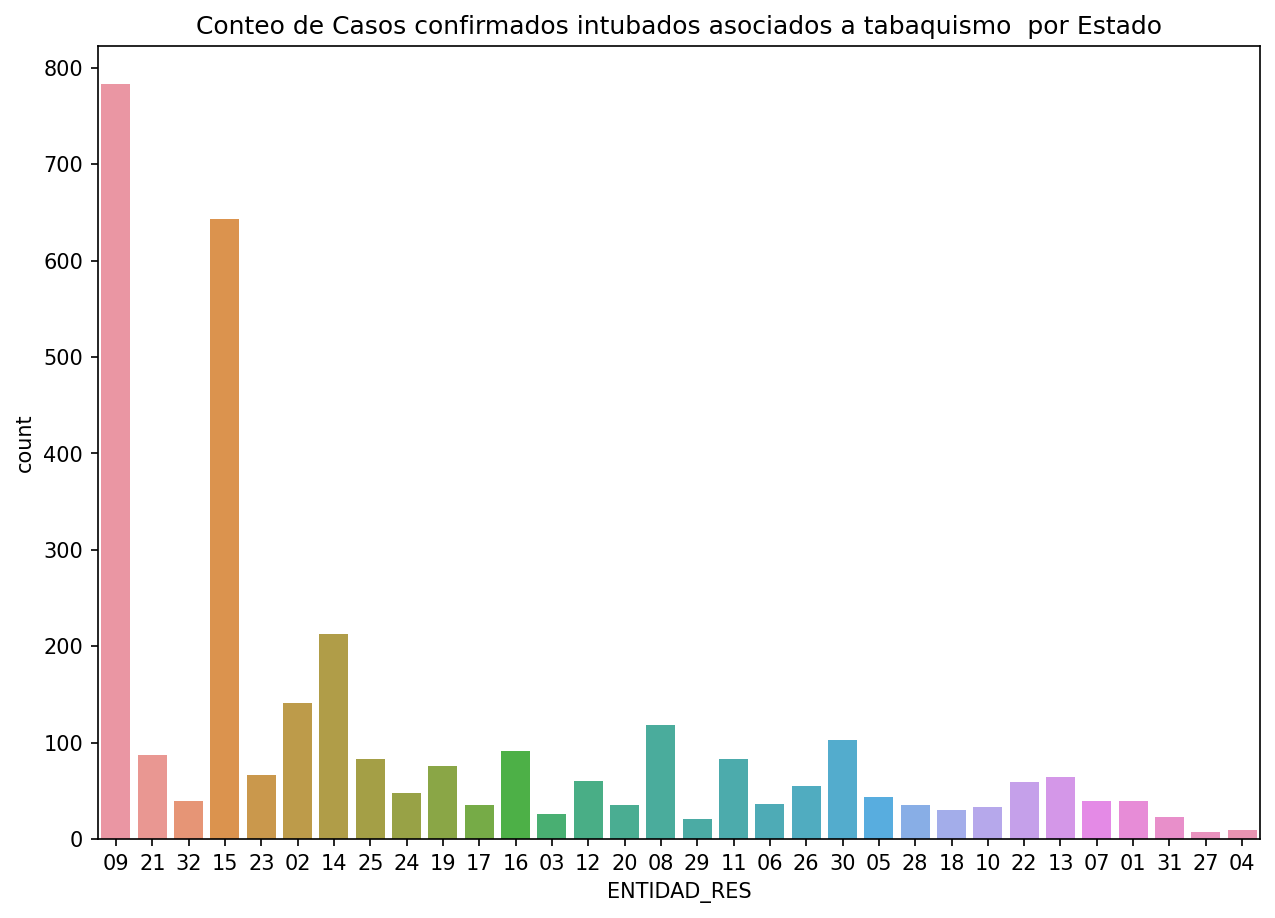

In [12]:
#Buscando hacer una tabla con lel ultimo filtro, para ver que estados tienen mas casos intubados
#asociados al tabaquismo, 
import matplotlib.pyplot as plt
import seaborn as sns

fig3, ax3 = plt.subplots(figsize=(10,7),dpi=150)
sns.countplot(data=casos_conf_tabaq_int[["ENTIDAD_RES","FECHA_ACTUALIZACION"]],x="ENTIDAD_RES",ax=ax3)
ax3.set_title("Conteo de Casos confirmados intubados asociados a tabaquismo  por Estado")
plt.show()

In [13]:
##obteniendo cifras a nivel estatal
#conocer que porcentaje de personas asociadas a tabaquismo fueron intubadas
conteo1=casos_conf_tabaq[["ENTIDAD_RES","FECHA_ACTUALIZACION"]].groupby("ENTIDAD_RES").count()\
                    .rename(columns={"FECHA_ACTUALIZACION":"tabaq"})
conteo2=(casos_conf_tabaq_int[["ENTIDAD_RES","FECHA_ACTUALIZACION"]].groupby("ENTIDAD_RES").count())\
                    .rename(columns={"FECHA_ACTUALIZACION":"tabaq_int"})
conteo3=conteo1.merge(conteo2,left_index=True,right_index=True,how="inner")
conteo3["porcentaje"]=(conteo3["tabaq_int"]/conteo3["tabaq"]).apply(lambda x: x*100)
conteo3

,tabaq,tabaq_int,porcentaje
ENTIDAD_RES,,,
01,1193,39,3.269070
02,2062,141,6.838021
03,837,26,3.106332
04,320,9,2.812500
05,2293,44,1.918884
06,514,36,7.003891
07,418,39,9.330144
08,2301,118,5.128205
09,23868,783,3.280543


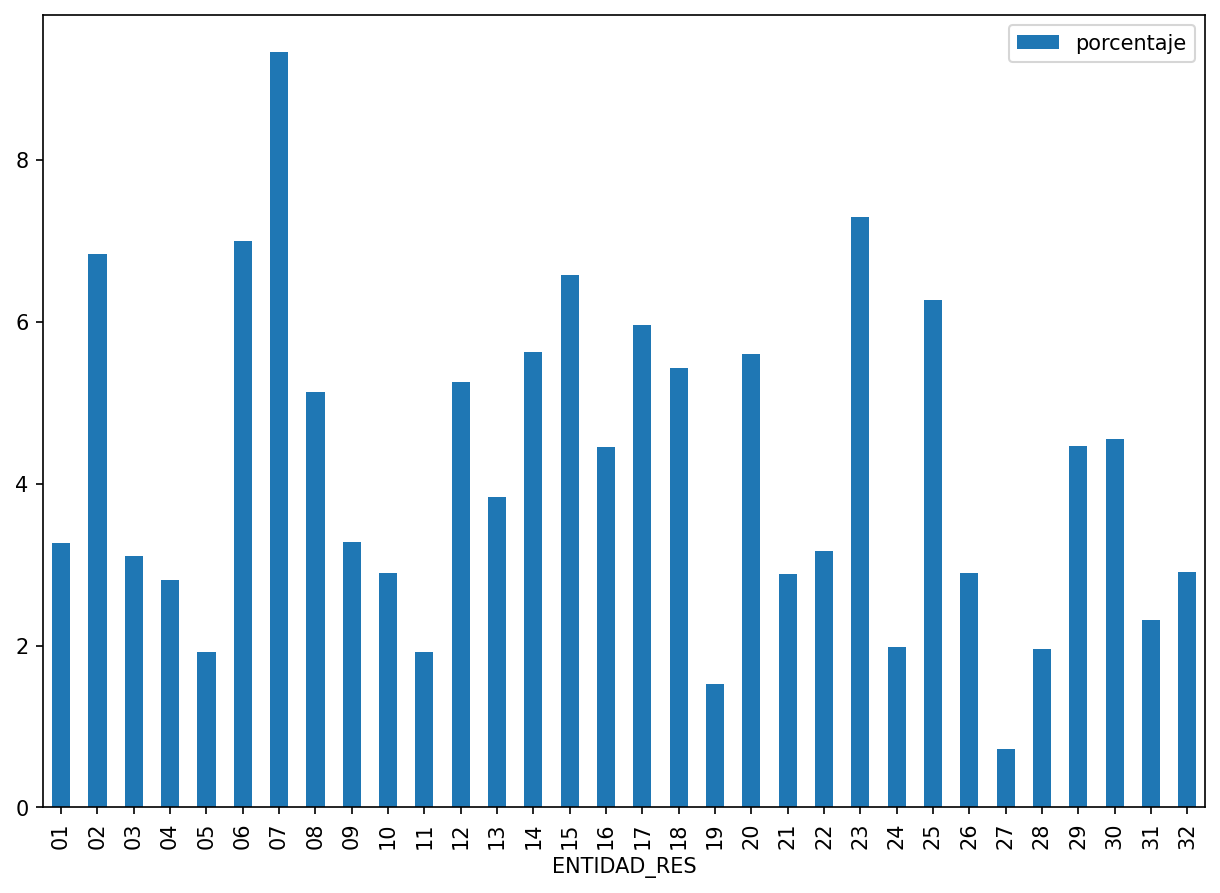

In [14]:
fig3, ax3 = plt.subplots(figsize=(10,7),dpi=150)
conteo3.reset_index().plot.bar(x="ENTIDAD_RES",y="porcentaje",ax=ax3)
plt.show()

se tenia la teoria que los casos asociados al tabaquismo tendrian altos porcentajes de ser intubados, regresemos a ver los datos para entender.

en realidad hay mas casos que tienen el valor "NO APLICA" al campo que define si se intubaron (ver el diccionario)

quiza los datos de intubacion relacionados al tabaquismo no aplican para un analisis directo, ya que el valor no aplica puede venir definido a partir de otras variables

In [15]:
casos_conf_tabaq.groupby("INTUBADO").count()[["FECHA_ACTUALIZACION"]]

,FECHA_ACTUALIZACION
INTUBADO,
1,3224
2,15470
97,64929
99,35


#### planteamiento 2

In [16]:
#leer los datos de poblacion
municipios=pd.read_csv("poblacion_mun/poblacion2.csv",dtype={"cvegeo":object})
municipios

,cvegeo,nom_mun,nom_ent,poblacion_pob_001
0,11029,San Diego de la Unión,Guanajuato,39668.0
1,11030,San Felipe,Guanajuato,113109.0
2,11031,San Francisco del Rincón,Guanajuato,119510.0
3,11032,San José Iturbide,Guanajuato,78794.0
4,05027,Ramos Arizpe,Coahuila de Zaragoza,92828.0
...,...,...,...,...
2460,09002,Azcapotzalco,Ciudad de México,400161.0
2461,09014,Benito Juárez,Ciudad de México,417416.0
2462,09015,Cuauhtémoc,Ciudad de México,532553.0
2463,09016,Miguel Hidalgo,Ciudad de México,364439.0


In [17]:
# obtener los datos del edomex
casos_eodmex=casos_confirmados[((casos_confirmados["ENTIDAD_RES"]=="15" ) & (casos_confirmados["MUNICIPIO_RES"]!="999"))]
casos_eodmex

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CVEGEOMUN
6,2020-12-02,0e07d8,1,4,15,2,15,15,104,2,...,1,1,2,97,3,99,MÃ©xico,97,2,15104
7,2020-12-02,13757c,1,12,15,1,15,15,106,1,...,1,1,2,97,3,99,MÃ©xico,97,97,15106
21,2020-12-02,08de8a,1,12,9,2,9,15,057,1,...,1,1,2,97,3,99,MÃ©xico,97,97,15057
26,2020-12-02,0608fa,2,12,15,1,15,15,104,1,...,1,1,2,97,3,99,MÃ©xico,97,97,15104
30,2020-12-02,0af798,1,4,15,2,21,15,060,2,...,1,1,2,97,3,99,MÃ©xico,97,2,15060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919508,2020-12-02,3b51e4,1,6,9,1,9,15,058,2,...,2,97,2,97,1,99,MÃ©xico,97,2,15058
2919635,2020-12-02,3871ce,1,12,9,2,9,15,058,1,...,2,97,1,1,3,99,MÃ©xico,97,97,15058
2919691,2020-12-02,334b62,1,12,9,1,9,15,058,1,...,2,97,1,1,3,99,MÃ©xico,97,97,15058
2919862,2020-12-02,29c755,2,12,9,2,13,15,121,1,...,2,97,1,1,3,99,MÃ©xico,97,97,15121


In [18]:
#contando los casos por municipio
conteo_edomex=casos_eodmex[["CVEGEOMUN","FECHA_ACTUALIZACION"]].groupby("CVEGEOMUN").count()\
                    .rename(columns={"FECHA_ACTUALIZACION":"casos"})
conteo_edomex

,casos
CVEGEOMUN,
15001,291
15002,942
15003,64
15004,51
15005,595
...,...
15121,2698
15122,1223
15123,109


In [19]:
tabla_tasa=conteo_edomex.reset_index().merge(municipios,left_on="CVEGEOMUN",right_on="cvegeo",how="left")
tabla_tasa["tasa_100mil"]=(tabla_tasa["casos"]/tabla_tasa["poblacion_pob_001"])*100000
tabla_tasa

,CVEGEOMUN,casos,cvegeo,nom_mun,nom_ent,poblacion_pob_001,tasa_100mil
0,15001,291,15001,Acambay de Ruíz Castañeda,México,66034.0,440.682073
1,15002,942,15002,Acolman,México,152506.0,617.680616
2,15003,64,15003,Aculco,México,49026.0,130.542977
3,15004,51,15004,Almoloya de Alquisiras,México,14846.0,343.526876
4,15005,595,15005,Almoloya de Juárez,México,176237.0,337.613554
...,...,...,...,...,...,...,...
120,15121,2698,15121,Cuautitlán Izcalli,México,531041.0,508.058700
121,15122,1223,15122,Valle de Chalco Solidaridad,México,396157.0,308.715989
122,15123,109,15123,Luvianos,México,27860.0,391.241924
123,15124,151,15124,San José del Rincón,México,93878.0,160.847057


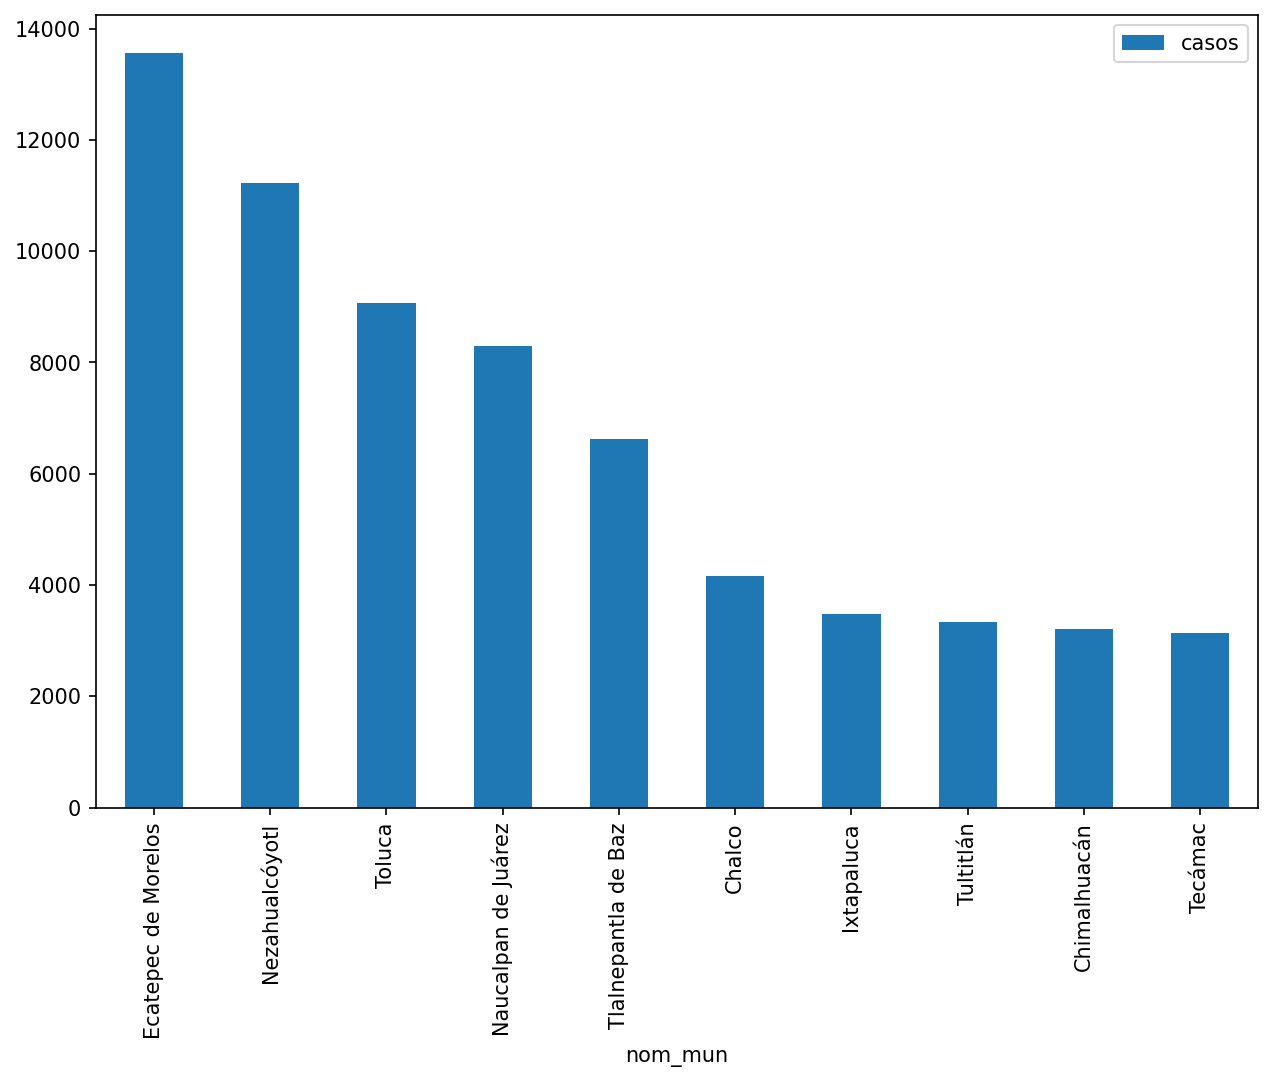

In [20]:
#graficando los 10 mas altos en cuanto a casos
fig3, ax3 = plt.subplots(figsize=(10,7),dpi=150)
tabla_tasa.sort_values(by="casos",ascending=False).iloc[:10].plot.bar(x="nom_mun",y="casos",ax=ax3)
plt.show()

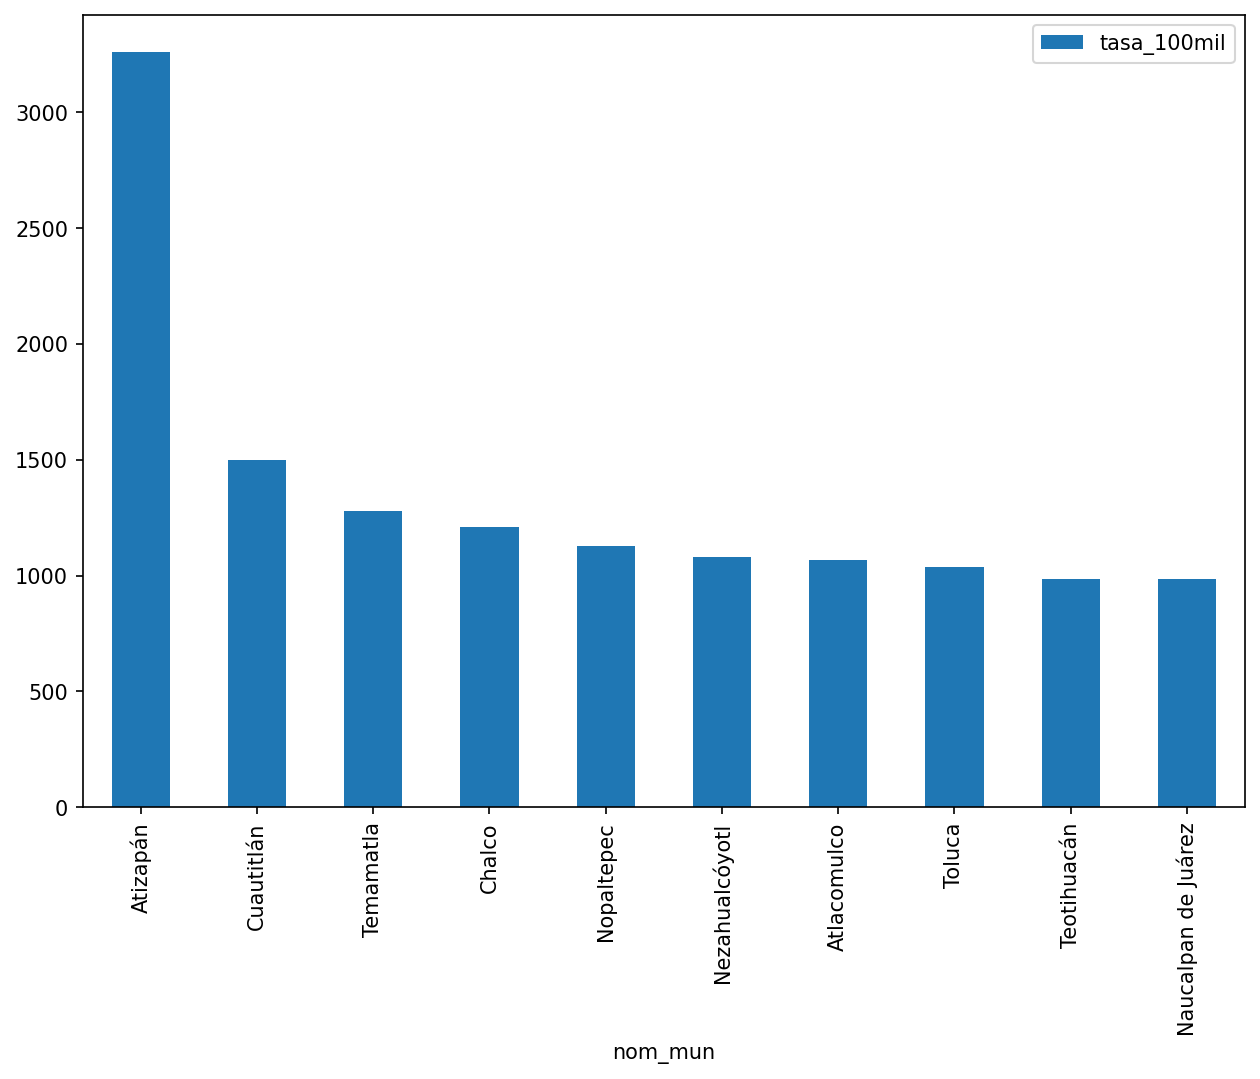

In [21]:
#graficando los 10 mas altos en cuanto a tasa
fig3, ax3 = plt.subplots(figsize=(10,7),dpi=150)
tabla_tasa.sort_values(by="tasa_100mil",ascending=False).iloc[:10].plot.bar(x="nom_mun",y="tasa_100mil",ax=ax3)
plt.show()